In [2]:
from abc import ABC, abstractmethod
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import beta
import copy
import numpy as np

In [3]:
class medicament():
    def __init__(self, numeros_medicaments):
        self.numeros_medicaments = numeros_medicaments

    def medicamentFonctionne(self):
        if self.numeros_medicaments == 0:
            return 0.3
        if self.numeros_medicaments == 1:
            return 0.85
        if self.numeros_medicaments == 2:
            return 0.1
        if self.numeros_medicaments == 3:
            return 0.3
        if self.numeros_medicaments == 4:
            return 0.5
        if self.numeros_medicaments == 5:
            return 0.9
        if self.numeros_medicaments == 6:
            return 0.4
        if self.numeros_medicaments == 7:
            return 0.75
        if self.numeros_medicaments == 8:
            return 0.1
        if self.numeros_medicaments == 9:
            return 0.33

In [4]:
class patient() :
    
    def medicamentFonctionne(self,num_medicament):
        tempMedoc = medicament(num_medicament)
        tempTaux = random.random()
        tauxReel = tempMedoc.medicamentFonctionne()
        if tempTaux > tauxReel:
            return True
        else: return False

In [11]:
class soignants() :
    numeros_medicaments = [0,1,2,3,4,5,6,7,8,9]
    jour = 0
    
    def experience20j(self):
        tempList = [0,0,0,0,0,0,0,0,0,0]
        listMedoc = []
        listeResultats = []
        jour = 0
        patientsGueris = 0
        while jour < 100:
            for i in range(len(tempList)): # on test tous les medicaments encore en lice
                if jour == 0:
                    tempPatient1 = patient()
                    tempPatient2 = patient()
                    if tempPatient1.medicamentFonctionne(i) == True :
                        if tempPatient2.medicamentFonctionne(i) == True :
                            tempList[i]=1
                            patientsGueris+= 2
                            listeResultats.append(True)
                            listeResultats.append(True)
                        else : 
                            tempList[i]=0.5
                            patientsGueris+=1
                            listeResultats.append(True)
                            listeResultats.append(False)
                    elif tempPatient2.medicamentFonctionne(i) == True:
                        tempList[i]=0.5
                        patientsGueris+=1
                        listeResultats.append(True)
                        listeResultats.append(False)
                    else : 
                        tempList[i]=0
                        listeResultats.append(False)
                        listeResultats.append(False)

                if jour > 0:
                    tempPatient1 = patient()
                    tempPatient2 = patient()
                    if tempPatient1.medicamentFonctionne(i) == True :
                        if tempPatient2.medicamentFonctionne(i) == True :
                            tempList[i]=(tempList[i]+1)*0.5
                            patientsGueris+=2
                            listeResultats.append(True)
                            listeResultats.append(True)
                        else : 
                            tempList[i]=(tempList[i]+0.5)*0.5
                            patientsGueris+=1
                            listeResultats.append(True)
                            listeResultats.append(False)
                    elif tempPatient2.medicamentFonctionne(i) == True:
                        tempList[i]=(tempList[i]+0.5)*0.5
                        patientsGueris+=1
                        listeResultats.append(True)
                        listeResultats.append(False)
                    else : 
                        tempList[i]=(tempList[i]+0)*0.5
                        listeResultats.append(False)
                        listeResultats.append(False)
                jour+=2
            element_min = min(tempList)
            indexOfMinElement = tempList.index(element_min)
            listMedoc.append(indexOfMinElement) 

            tableau_supprime = listMedoc
            taille_tableau = 10
            index_non_supprimes = [i for i in range(taille_tableau) if i not in tableau_supprime]
            if len(index_non_supprimes) >= 2:
                premier_index = index_non_supprimes[0]
                deuxieme_index = index_non_supprimes[1]
            tempList.remove(element_min)

        valeurs = listeResultats
        nb_true = 0
        nb_false = 0
        nb_true_list = []
        nb_false_list = []
        for valeur in valeurs:
            if valeur:
                nb_true += 1
            else:
                nb_false += 1
            nb_true_list.append(nb_true)
            nb_false_list.append(nb_false)
        plt.plot(nb_false_list, nb_true_list, 'bo-')
        plt.xlabel('Nombre de Non-Soignés')
        plt.ylabel('Nombre de Soignés')
        plt.title("Répartition des Soignés et non-Soignés")
        plt.show()

        valeurs = ['True', 'False']
        hauteurs = [nb_true, nb_false]
        plt.bar(valeurs, hauteurs)
        plt.xlabel('Valeurs')
        plt.ylabel('Nombre')
        plt.title('Nombre de Soignés et non-Soignés')
        plt.show()

        print("Nombre de patients Guéris : ",patientsGueris)

    def experience30j(self):
        tempList = [0,0,0,0,0,0,0,0,0,0]
        listMedoc = []
        listeResultats = []
        jour = 0
        patientsGueris = 0
        while jour < 100:
            for i in range(len(tempList)):
                if jour == 0:
                    tempPatient1 = patient()
                    if tempPatient1.medicamentFonctionne(i) == True :
                        tempList[i]=1
                        patientsGueris+= 1
                        listeResultats.append(True)
                    if tempPatient1.medicamentFonctionne(i) == False :
                        tempList[i]=0
                        patientsGueris+= 0
                        listeResultats.append(False)

                if jour > 0:
                    tempPatient1 = patient()
                    if tempPatient1.medicamentFonctionne(i) == True :
                        tempList[i]=(tempList[i]+1)*0.5
                        patientsGueris+= 1
                        listeResultats.append(True)
                    if tempPatient1.medicamentFonctionne(i) == False :
                        tempList[i]=(tempList[i]+0)*0.5
                        patientsGueris+= 0
                        listeResultats.append(False)
                jour+=3
            element_min = min(tempList)
            indexOfMinElement = tempList.index(element_min)
            listMedoc.append(indexOfMinElement) 

            tableau_supprime = listMedoc
            taille_tableau = 10
            index_non_supprimes = [i for i in range(taille_tableau) if i not in tableau_supprime]
            if len(tempList) > 1:
                tempList.remove(element_min)
            if len(index_non_supprimes) >= 2:
                premier_index = index_non_supprimes[0]
                deuxieme_index = index_non_supprimes[1]


        valeurs = listeResultats
        nb_true = 0
        nb_false = 0
        nb_true_list = []
        nb_false_list = []
        for valeur in valeurs:
            if valeur:
                nb_true += 1
            else:
                nb_false += 1
            nb_true_list.append(nb_true)
            nb_false_list.append(nb_false)
        plt.plot(nb_false_list, nb_true_list, 'bo-') # Affiche le diagramme en ligne
        plt.xlabel('Nombre de Soignés')
        plt.ylabel('Nombre de Non-Soignés')
        plt.title("Répartition de Soignés et non-Soignés")
        plt.show()

        nb_true = nb_true # Affiche le diagramme en barre
        nb_false = nb_false
        valeurs = ['Soignés', 'Non-Soignés']
        hauteurs = [nb_true, nb_false]
        plt.bar(valeurs, hauteurs)
        plt.xlabel('Valeurs')
        plt.ylabel('Nombre')
        plt.title('Nombre de Soignés et non-Soignés')
        plt.show()

        print("Nombre de patients Guéris : ", patientsGueris)

  

    def experience10j_beta(self): #programme qui trouve le meilleur medoc grace a la loi beta
        tempList = [0,1,2,3,4,5,6,7,8,9]
        alphas = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
        betas = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
        betas_Succes = [0,0,0,0,0,0,0,0,0,0]
        jour = 0
        listeRatios = []
        # La liste tempList contient les indices des médicaments à tester.
        # Les listes alphas et betas contiennent les paramètres de la loi beta pour chaque médicament.
        # La liste betas_Succes stocke les probabilités de succès pour chaque médicament.
        # La variable jour est initialisée à 0.
        while jour < 100:
            for i in range(len(tempList)):
                jour+=1
                tempPatient = patient()
                # Pour chaque médicament dans tempList, on crée un objet patient temporaire.
                if tempPatient.medicamentFonctionne(tempList[i]) == True :
                    alphas[tempList[i]] += 1
                    listeRatios.append(True)
                elif tempPatient.medicamentFonctionne(tempList[i]) == False:
                    betas[tempList[i]] += 1
                    listeRatios.append(False)
                # On appelle la méthode medicamentFonctionne() de l'objet patient temporaire pour déterminer
                # si le médicament est efficace ou non. En fonction du résultat, les paramètres alphas ou betas
                # sont incrémentés.

                success_prob = beta.rvs(alphas[i], betas[i])
                if i < len(betas_Succes):
                    betas_Succes[i] = success_prob

            # On utilise la fonction rvs() de la distribution beta pour générer une probabilité de succès
            # en utilisant les paramètres alphas et betas pour chaque médicament. La probabilité est ensuite
            # stockée dans la liste betas_Succes.

            if len(betas_Succes) > 1:
                minIndex = betas_Succes.index(min(betas_Succes))
                betas_Succes.pop(minIndex)
            
            for i in range(10):
                success_prob = beta.rvs(alphas[i], betas[i])
                if i < len(betas_Succes):
                    betas_Succes[i] = success_prob
        
        somme = 0
        for valeur in alphas: # fais la somme des personnes guéris
            somme += valeur 

        valeurs = listeRatios
        nb_true = 0
        nb_false = 0
        nb_true_list = []
        nb_false_list = []
        for valeur in valeurs:
            if valeur:
                nb_true += 1
            else:
                nb_false += 1
            nb_true_list.append(nb_true)
            nb_false_list.append(nb_false)
        plt.plot(nb_false_list, nb_true_list, 'bo-')
        plt.xlabel('Nombre de Soignés')
        plt.ylabel('Nombre de Non-Soignés')
        plt.title("Répartition de Soignés et Non-Soignés")
        plt.show()

        nb_true = somme 
        nb_false = 100 - somme
        valeurs = ['Soignés', 'Non Soignés']
        hauteurs = [nb_true, nb_false]
        plt.bar(valeurs, hauteurs)
        plt.xlabel('Valeurs')
        plt.ylabel('Nombre')
        plt.title('Nombre de Soignés et Non-Soignés')
        plt.show()

        
        alphas_10 = alphas[:10]
        betas_10 = betas[:10]

        x = np.linspace(0, 1, 100)  # Création d'un tableau de valeurs entre 0 et 1
        # Définition des styles de ligne et des couleurs
        line_styles = ['-', '--', '-.', ':']  # Styles de ligne
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Couleurs
        # Tracer les courbes de distribution beta pour les 10 premières valeurs
        for i in range(len(alphas_10)):
            alpha2 = alphas_10[i]
            beta2 = betas_10[i]
            pdf = beta.pdf(x, alpha2, beta2)

            # Sélectionner le style de ligne et la couleur
            line_style = line_styles[i % len(line_styles)]
            color = colors[i % len(colors)]

            plt.plot(x, pdf, linestyle=line_style, color=color, label=f'Médic. {i} : Alpha={alpha2}, Beta={beta2}')

        plt.xlabel('x')
        plt.ylabel('Densité de probabilité')
        plt.title('Distributions Beta des Médicaments')
        plt.grid(True)
        plt.legend()  # Ajouter une légende pour identifier chaque courbe
        plt.show()
        
        print("Nombre de personne Guéris :", somme)  

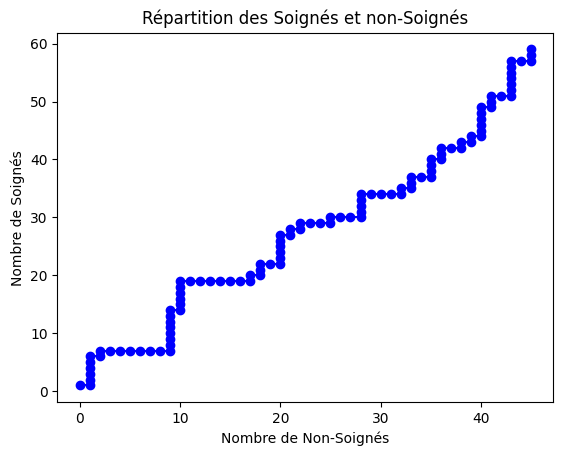

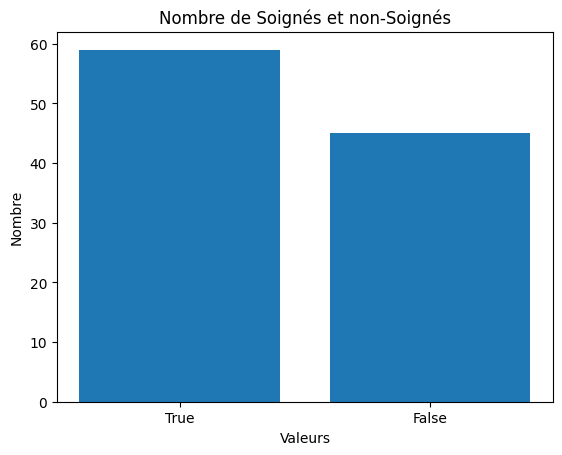

Nombre de patients Guéris :  59


(0.12502673640847206,
 351,
 [True,
  True,
  False,
  False,
  True,
  True,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  False,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  False,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  False,
  Fals

In [30]:
messoignants = soignants()
messoignants.experience20j()
messoignants.experience30j()

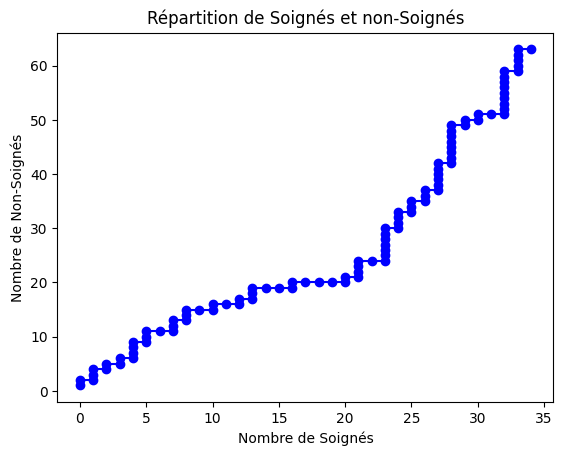

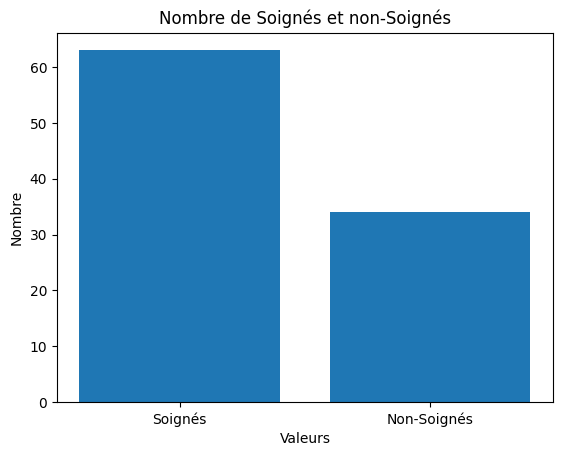

Nombre de patients Guéris :  63


In [29]:
messoignants = soignants()
messoignants.experience10j()

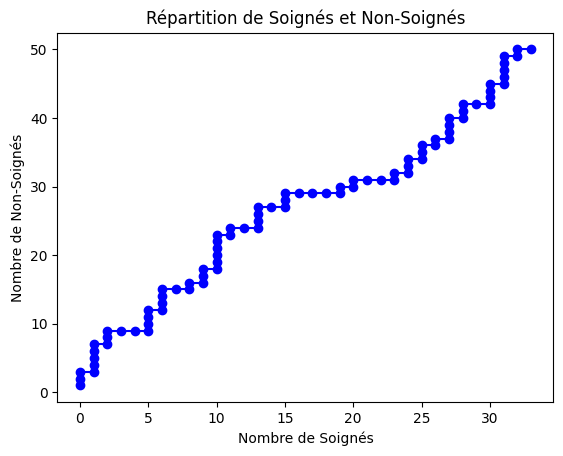

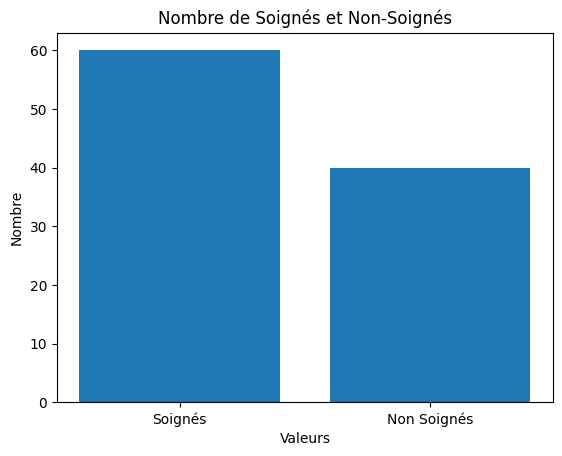

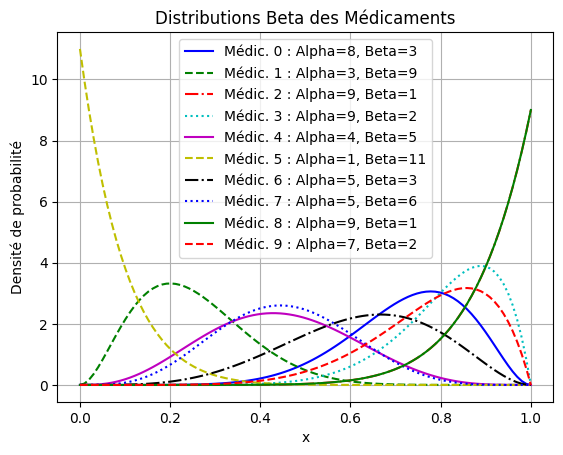

Nombre de personne Guéris : 60


In [8]:
messoignants = soignants()
messoignants.experience10j_beta()

ZeroDivisionError: division by zero